<a href="https://colab.research.google.com/github/Bourbon-Rye/Baesian-Cropability/blob/main/PilipiNuts_2023_Baesian_Cropability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Libraries
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

# PilipiNuts 2023 Visualizations Guidebook

This workbook contains sample codes for generating the "Nutshell" plots for the PilipiNuts 2023 master portfolio.

The goal of this guidebook is to have a consistent look-and-feel for all the nutshell plots, as they will be compiled in one master portfolio.


For more info, read the visual guide [here](https://www.canva.com/design/DAGDHCFpdEQ/-SMbF1IkDRs-Mo9LRhj69w/edit?utm_content=DAGDHCFpdEQ&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton).


In [ ]:
# @title Data sets

# Sample data sets; for plotting purposes
df_titanic = sns.load_dataset('titanic')   # classification
df_penguins = sns.load_dataset("penguins") # multivariate
df_tips = sns.load_dataset('tips')         # regression
df_iris = sns.load_dataset('iris')         # clustering
df_flights = sns.load_dataset("flights")   # time-series

## Plot Elements

Plots should have (but are not limited to) the following elements:
* Title: summarizes what the plot is about
* Axes labels (x/y/z): as needed
* Axes lines (x/y/z): as needed
* Axes tick labels (x/y/z): as needed
* Main plot: annotated as needed
* Legends: as needed
* Reference: data source/s

Visit the [2023 State of AI](https://hai.stanford.edu/news/2023-state-ai-14-charts) website for examples of high-quality graphs.
<br>
<br>
[![Sample graph](https://hai.stanford.edu/sites/default/files/inline-images/AIIndex_2023_StateofAI_Blog_2.jpg)]()

As much as possible, avoid the following:
* Grid lines: unless your plot is a map, use guidelines instead if you want to emphasize certain values
* Ticks: remove the small tick lines on the axes. Remember, less is more.
* Spines: remove the upper and right borders (spines) on the plots to make it look cleaner
* TMI: avoid overcrowding your plots with too much data


## Design

The following design settings are for the "Nutshell graph" that will be included in the master portfolio.

You are advised <font color='violet'>not to adapt these styles</font> for the other visualizations in your own portfolio. Instead, use the style that fits your web site design.

In [ ]:
# @title Download fonts
!wget 'https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Light.ttf'
!wget 'https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Regular.ttf'
!wget 'https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Medium.ttf'
!wget 'https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Bold.ttf'

In [ ]:
# @title Typesetting
# https://stackoverflow.com/a/65841091
from matplotlib import font_manager as fm, pyplot as plt

font_files = fm.findSystemFonts('.')

# Install fonts
for font_file in font_files:
  fm.fontManager.addfont(font_file)

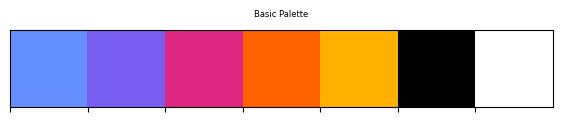

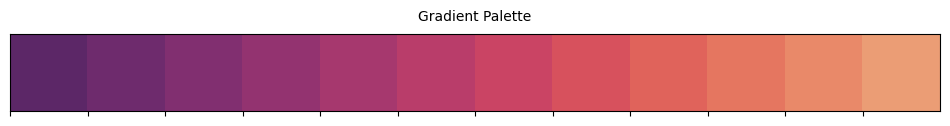

In [ ]:
# @title Colors
colors = ["#648FFF", "#785EF0", "#DC267F", "#FE6100", "#FFB000", "#000000", "#FFFFFF"]
colors_grad = sns.color_palette('flare_r',  12)
colors_heat1 = sns.color_palette('flare_r', as_cmap=True)
colors_heat2 = sns.diverging_palette(315, 261, s=74, l=50, center='dark', as_cmap=True)

color_bg = "#1B181C"
color_text = "#FFFFFF"


sns.palplot(colors)
plt.gca().set_title('Basic Palette', fontsize=6, pad=10)

sns.palplot(colors_grad)
plt.gca().set_title('Gradient Palette', fontsize=10, pad=10)

plt.show()

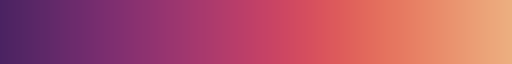

In [ ]:
# Heatmap Palette (1-way)
colors_heat1

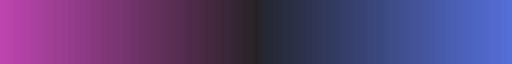

In [ ]:
# Heatmap Palette (2-way)
colors_heat2

In [ ]:
# @title Plot settings
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams["figure.figsize"] = 16,8

# Text
mpl.rcParams['font.family'] = 'Roboto'

# Title
mpl.rcParams['figure.titlesize'] = 32
mpl.rcParams['axes.titlesize'] = 32
mpl.rcParams['axes.titleweight'] = 'bold'

# Labels
mpl.rcParams['axes.labelsize'] = 22
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22

# Spacing
mpl.rcParams['axes.titlepad'] = 72
mpl.rcParams['axes.labelpad'] = 10
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['ytick.major.pad'] = 10
mpl.rcParams['xtick.major.width'] = 0
mpl.rcParams['xtick.minor.width'] = 0
mpl.rcParams['ytick.major.width'] = 0
mpl.rcParams['ytick.minor.width'] = 0

# Spines and grids
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False

# Legends
mpl.rcParams['legend.title_fontsize'] = 18
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['legend.frameon'] = False

# Bars
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

# Colors
mpl.rcParams["figure.facecolor"] = color_bg
mpl.rcParams["axes.facecolor"] = color_bg
mpl.rcParams["savefig.facecolor"] = color_bg

# Text colors
mpl.rcParams['text.color'] = color_text
mpl.rcParams['axes.labelcolor'] = color_text
mpl.rcParams['xtick.color'] = color_text
mpl.rcParams['ytick.color'] = color_text

# Line colors
mpl.rcParams['axes.edgecolor'] = color_text

## Sample Plots

Here are sample plots that you can use to visualize your data. You may use other types of plots (such as box plots) that are not presented here.

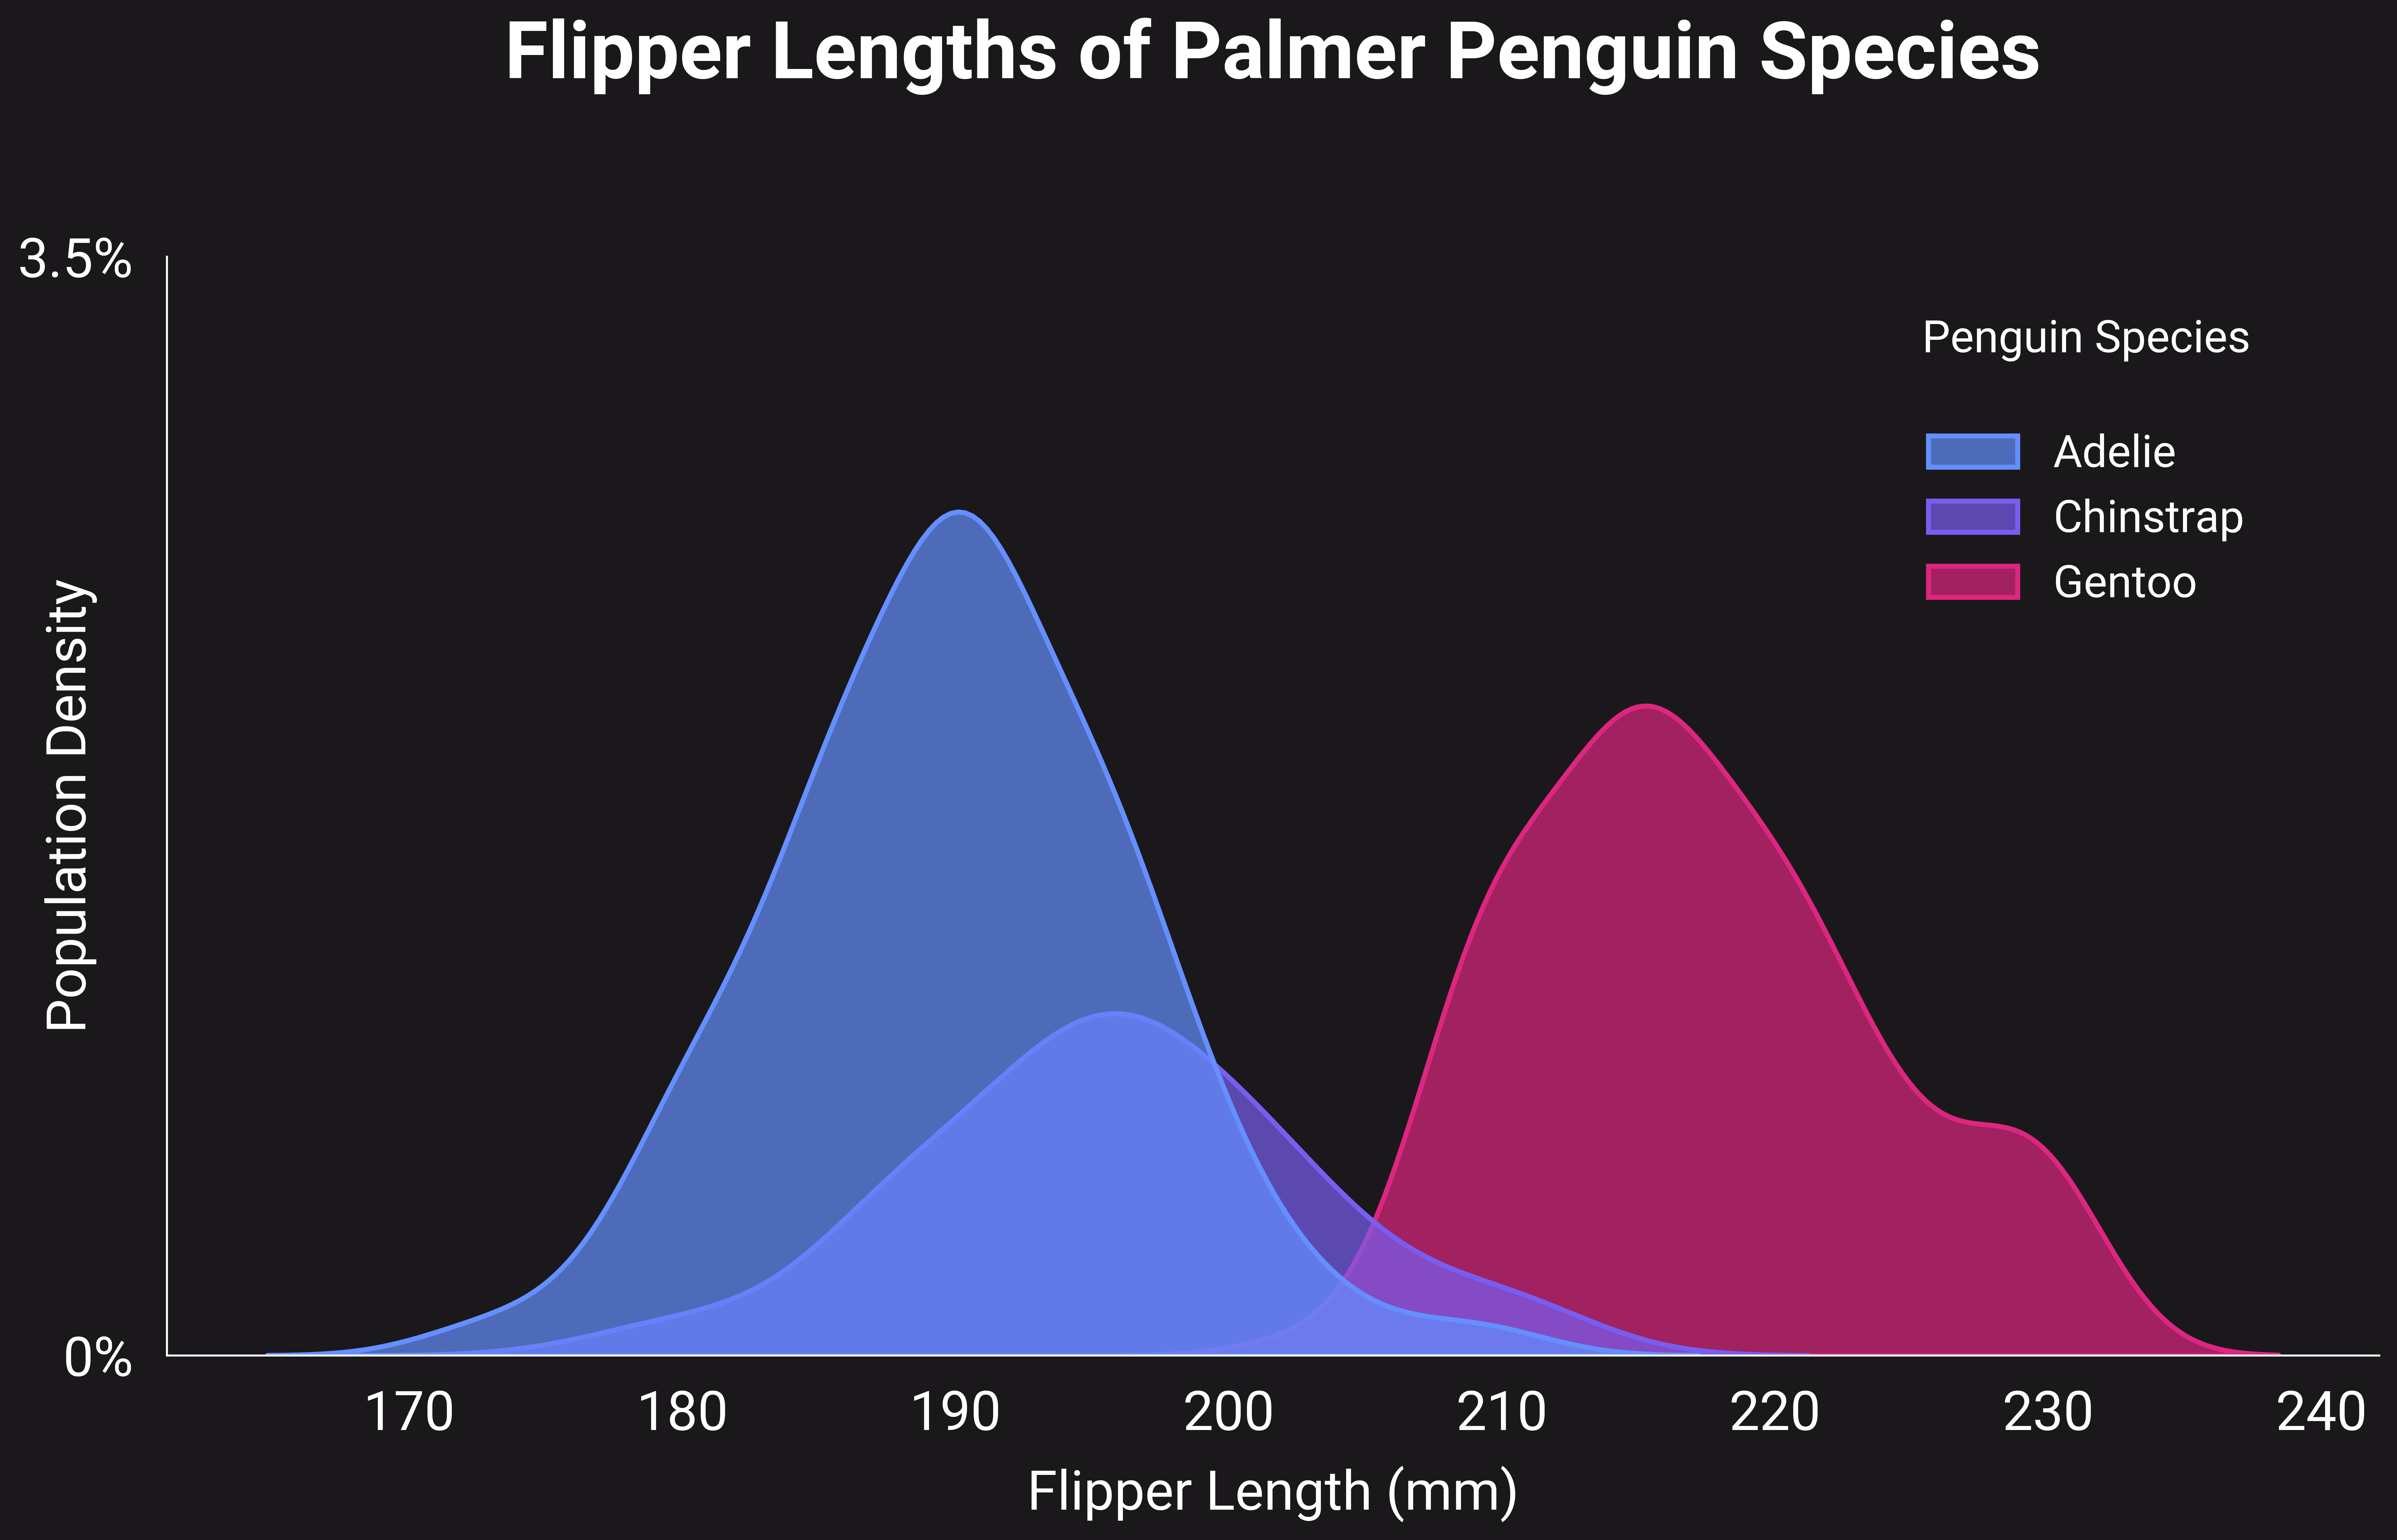

In [ ]:
# @title Comparing distributions
df = df_penguins.copy()

f, ax = plt.subplots(figsize=(16, 8))
g = sns.kdeplot(data=df, x="flipper_length_mm", hue="species", multiple="layer", common_norm=True,
                ax=ax, palette=colors[0:3], fill=True, alpha=0.7, linewidth=2)

ax.set(xlabel="Flipper Length (mm)", ylabel="Population Density")
ax.set_title('Flipper Lengths of Palmer Penguin Species')

# Clean up y-axis
ax.set_yticks([0, 0.035], labels=['0%', '3.5%'])
ax.set_ylabel(ylabel="Population Density", labelpad=-32)

sns.move_legend(g, "upper right", bbox_to_anchor=(0.96, 0.98), ncol=1, title='Penguin Species\n')
plt.show()

In [ ]:
# @title Comparing categorical groups

df = df_titanic.copy()
# df['deck'] = df['deck'].cat.add_categories('?').fillna('?') # include missing data

g = sns.catplot(data=df, x="deck", hue="class", kind="count",
                palette=colors[0:3], height=8, aspect=2)

g.ax.set(xlabel="Cabin Deck", ylabel="Passenger Count")
g.ax.set_title('Distribution of Titanic Passenger Classes to Cabin Decks')

sns.move_legend(g, "upper right", bbox_to_anchor=(0.88, 0.98), ncol=3, title='Passenger Class\n')
plt.show()

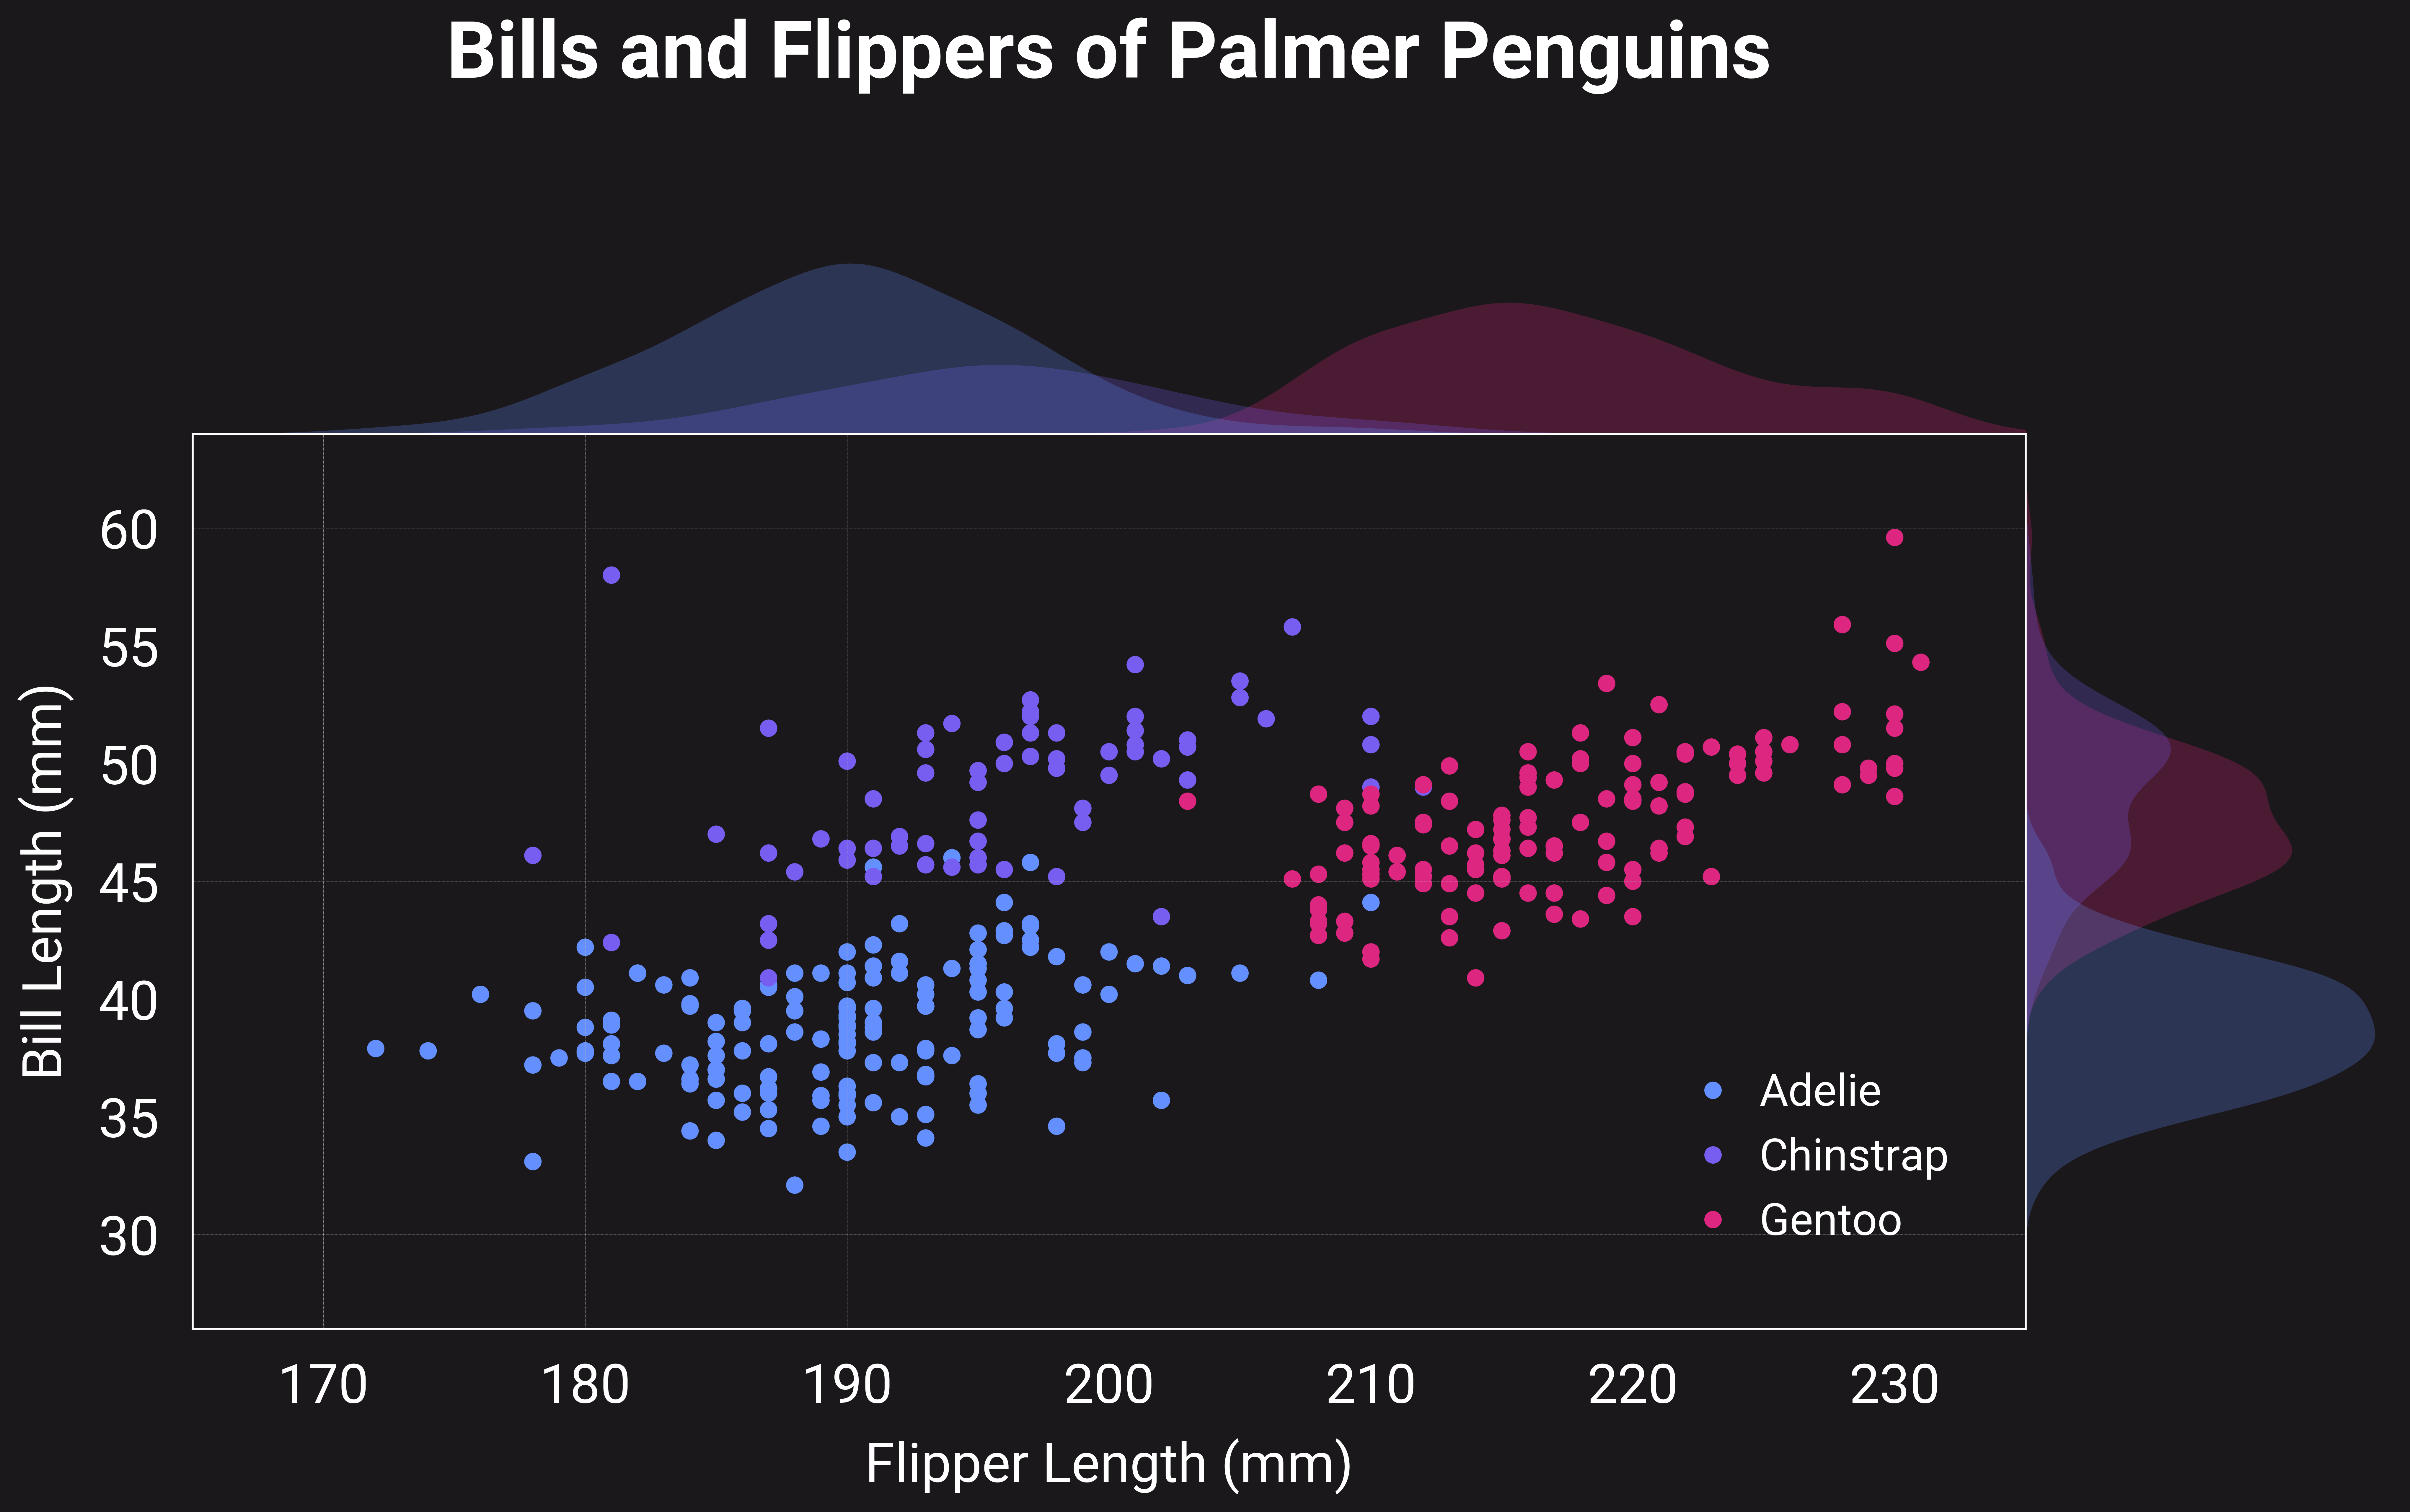

In [ ]:
# @title Displaying groups

df = df_penguins.copy()

g = sns.jointplot(data=df, x="flipper_length_mm", y="bill_length_mm", hue="species",
                  palette=colors[0:3], space=0, linewidth=0, s=50)

# Joint plots contain multiple plots
fig = g.figure
ax_mid = fig.axes[0]    # center: scatter plot
ax_top = fig.axes[1]    # top: x-axis distribution
ax_right = fig.axes[2]  # right: y-axis distribution

# Add grids and clean up spines
ax_mid.grid(True, axis='both', linewidth=0.1, ls='--')
sns.despine(ax=ax_top, left=True, top=True, right=True)
sns.despine(ax=ax_right, bottom=True, top=True, right=True)
sns.despine(ax=ax_mid, top=False, right=False)

# Adjust axes
ax_mid.set_xlim(165,235)
ax_mid.set_ylim(26,64)

# Add titles, labels, and legends
ax_mid.set(xlabel="Flipper Length (mm)", ylabel="Bill Length (mm)")
ax_mid.set_title('Bills and Flippers of Palmer Penguins', y=1.2)

sns.move_legend(ax_mid, "lower right", bbox_to_anchor=(0.98, 0.05), ncol=1,
                handletextpad=0.05, title=None) # remove title due to limited space

# Adjust figure size
g.fig.set_figwidth(16)
g.fig.set_figheight(7.6)

plt.show()

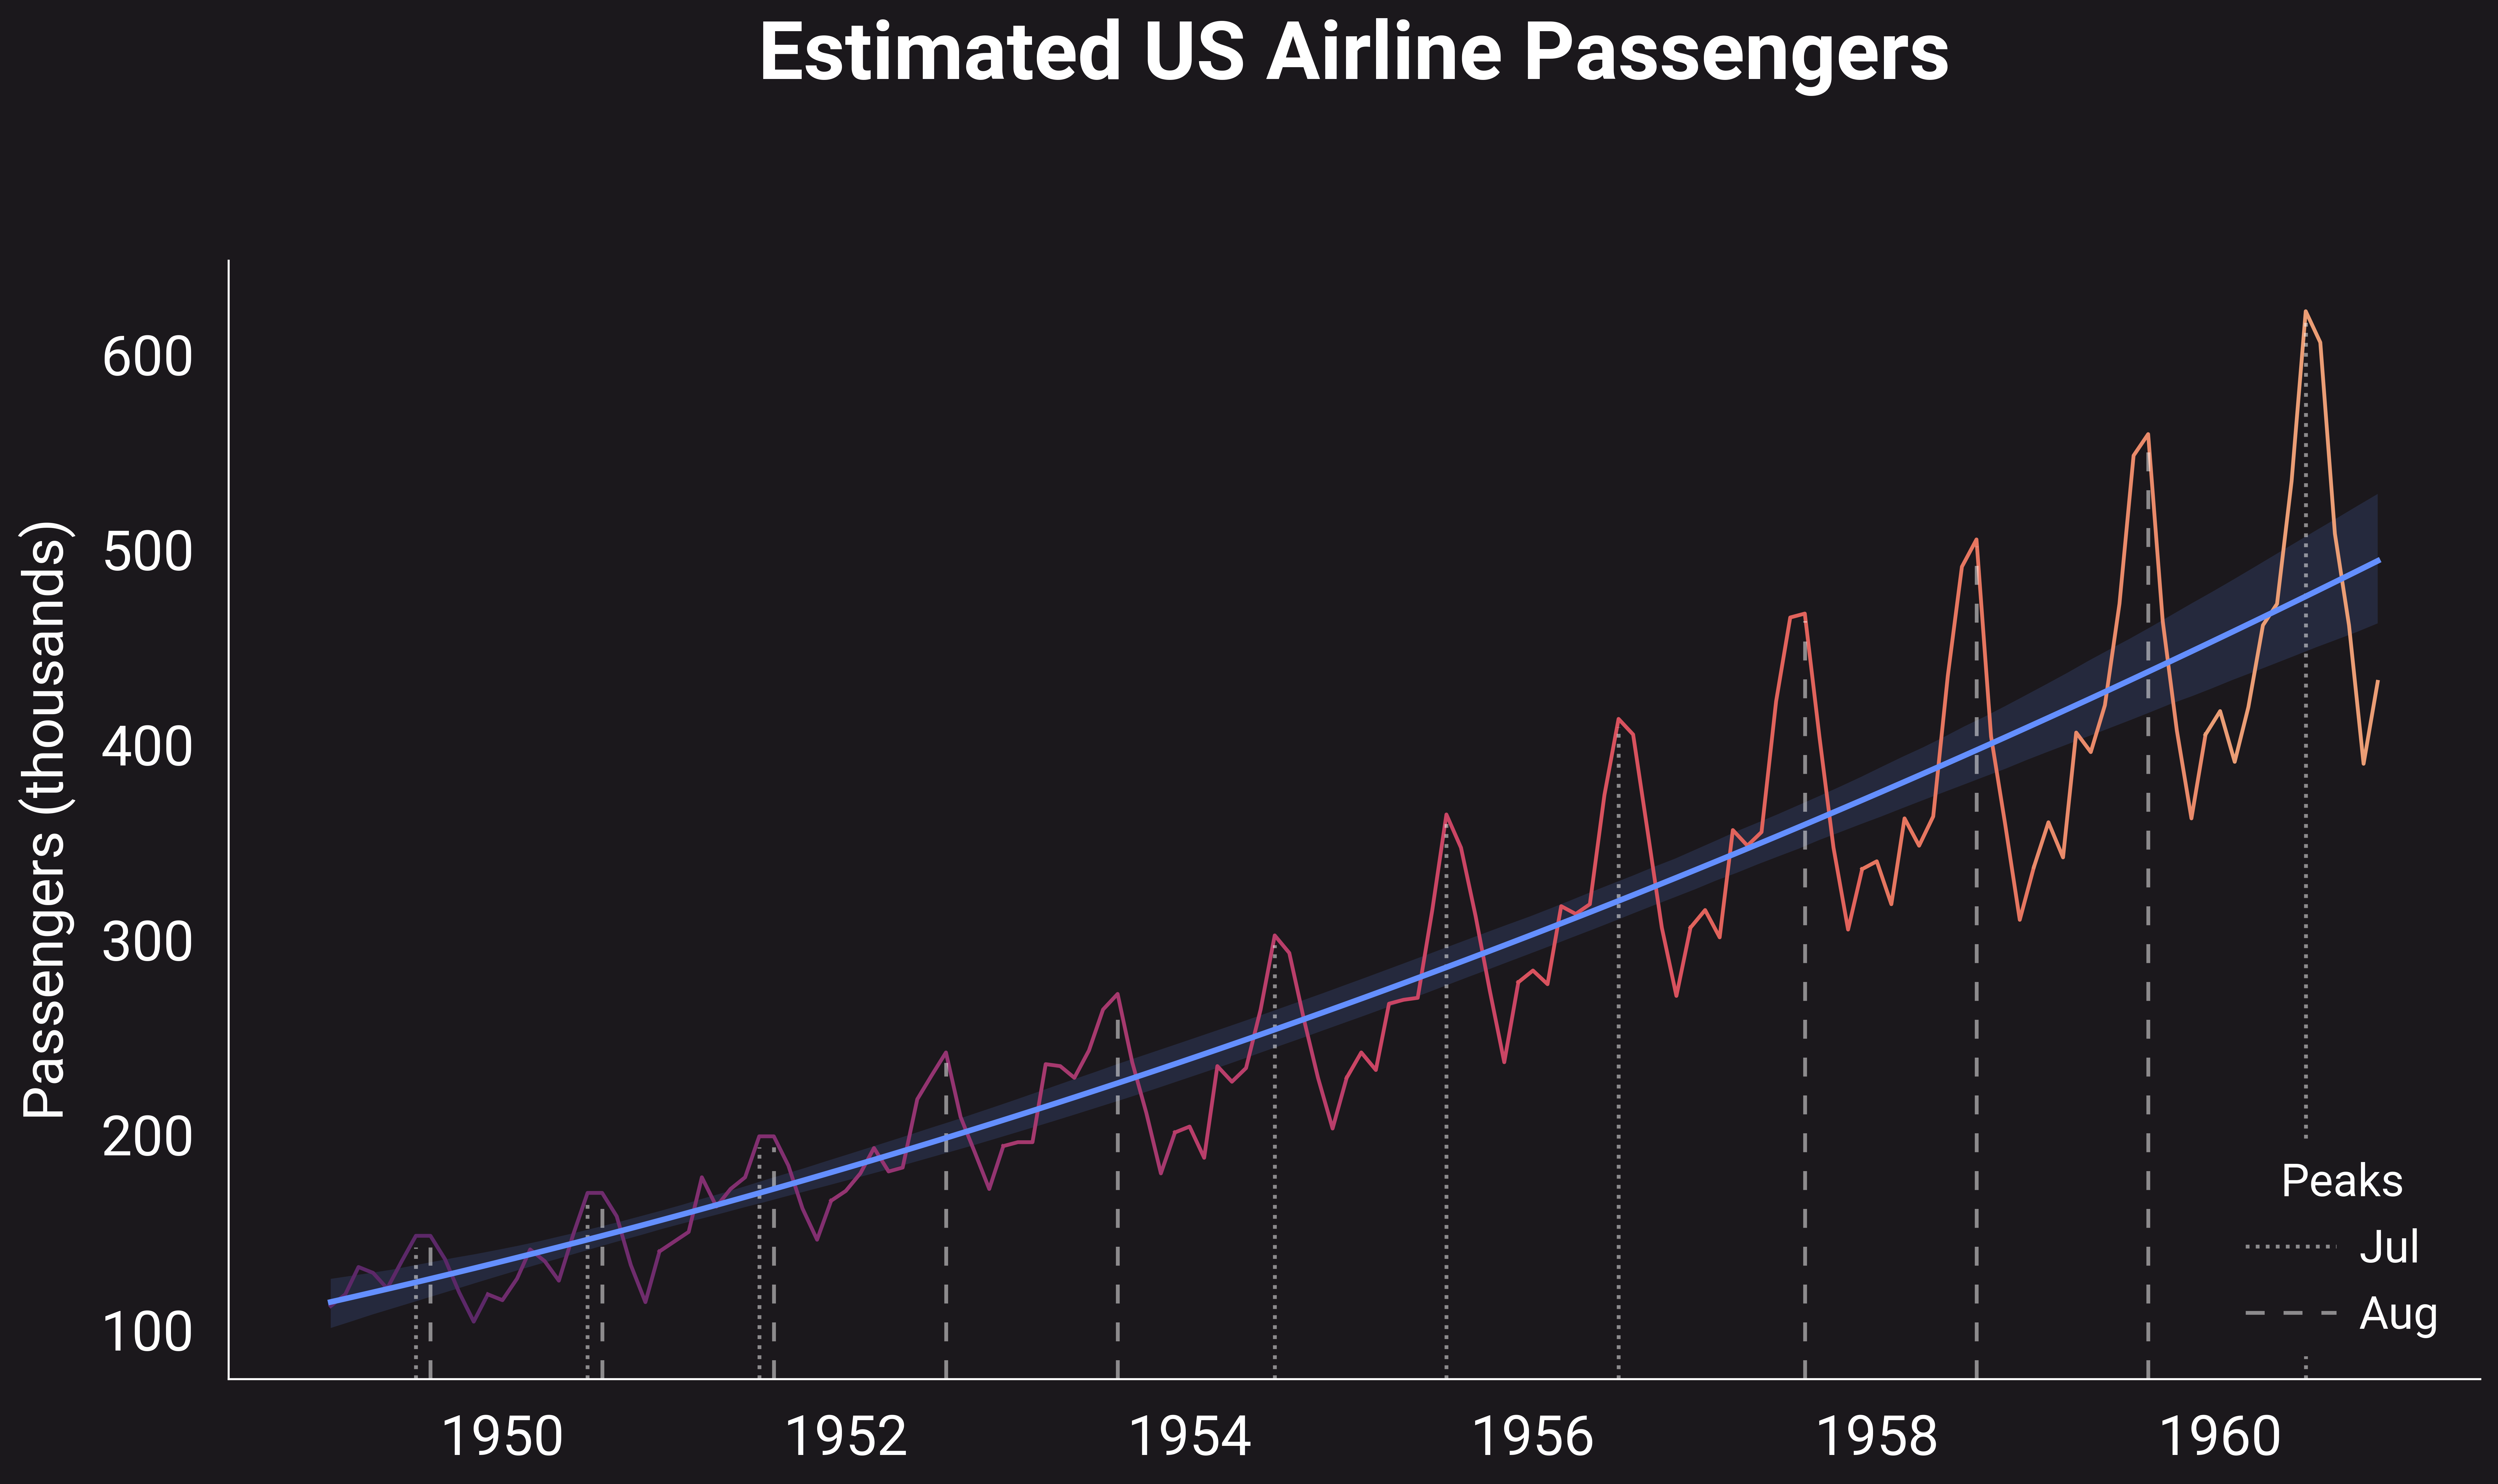

In [ ]:
# @title Displaying trends
date_map = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06',
            'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}

df = df_flights.copy()
df['month'] = df['month'].map(date_map)
df['date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))

f, ax = plt.subplots(figsize=(16, 8))

# sns.lineplot(data=df, x='date', y='passengers', ax=ax, color=colors[0]) # monotone plot

# Plot monthly data per year
for c, y in zip(range(df['year'].nunique()), df['year'].unique()):
  idx = df.index[df['year'] == y].tolist()
  if min(idx)-1 > 0: idx.insert(0, min(idx)-1)
  df_y = df.iloc[idx]
  sns.lineplot(data=df_y, x='date', y='passengers',
               ax=ax, color=colors_grad[c], legend=False)

# Plot peaks per year
msk = df.groupby(['year'])['passengers'].transform('max') == df['passengers']
peak_dates = df.loc[msk, ['passengers', 'month', 'date']]
for index, row in peak_dates.iterrows():
  height = ax.get_ylim()[1]-ax.get_ylim()[0]
  m, x, y = row['month'], row['date'], (row['passengers']-ax.get_ylim()[0])/height-0.005

  if m == '07':
    ax.axvline(x=x, ymax=y, color=color_text, linestyle=':', alpha=0.5, label='Jul')
  elif m == '08':
    ax.axvline(x=x, ymax=y, color=color_text, linestyle='dashed', dashes=(5, 5), alpha=0.5, label='Aug')

# Plot regression line
df['date_reg'] = mpl.dates.date2num(df['date']) # regplot does not work with timestamps
sns.regplot(data=df, x='date_reg', y='passengers', order=2,
            ax=ax, scatter=False, color=colors[0])


# Add titles, labels, and legends
ax.set(xlabel=None, ylabel='Passengers (thousands)')
ax.set_title('Estimated US Airline Passengers')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='lower right',
           facecolor=color_bg, framealpha=1, frameon=True, handletextpad=0.5, title='Peaks')

plt.show()

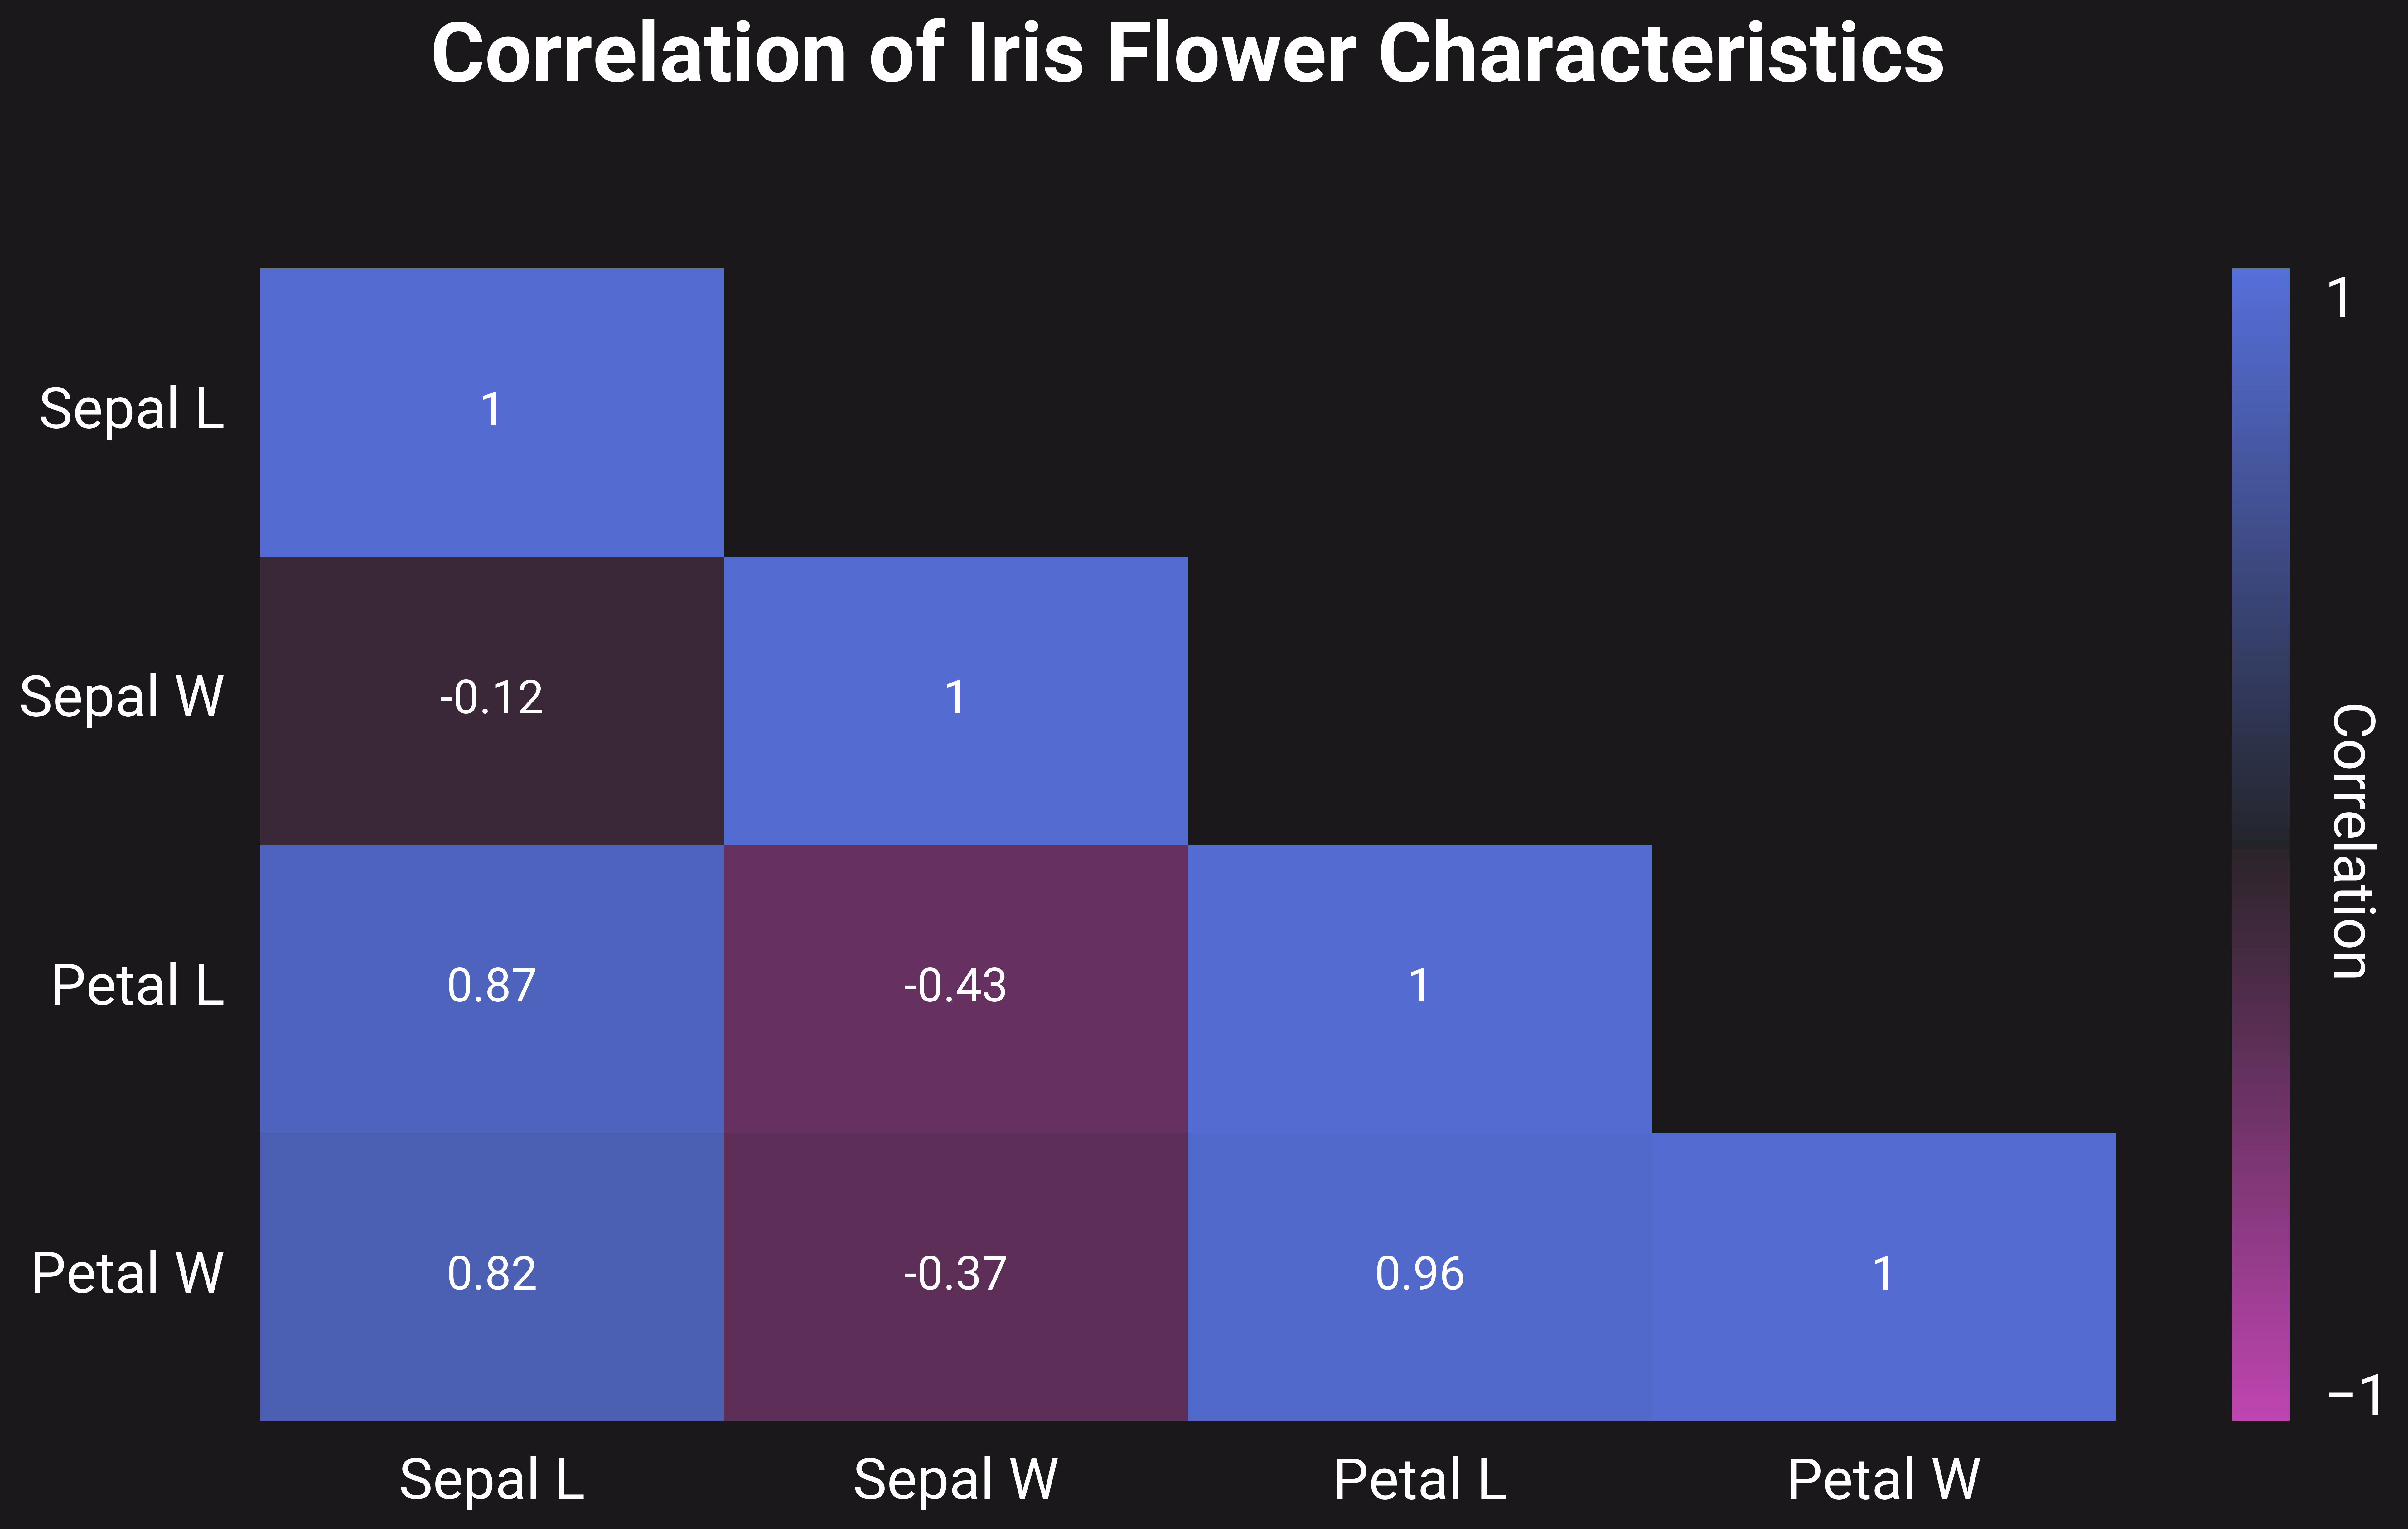

In [ ]:
# @title Displaying correlations
df = df_iris.copy()
df_x = df.drop('species', axis=1)

corr = df_x.corr()
mask = np.triu(np.ones_like(corr)) # remove upper triangle
np.fill_diagonal(mask, 0)          # retain diagonal (better to remove this as well)

f, ax = plt.subplots(figsize=(16, 8))

# Plot correlation map
sns.heatmap(corr, mask=mask, cmap=colors_heat2,
            ax=ax, annot=True, annot_kws={'fontsize':18},
            vmin=-1.05, vmax=1.05, cbar_kws={'ticks':[-1,1]})

# Add titles, labels, and legends
ax.set_title('Correlation of Iris Flower Characteristics')
ax.set(xticklabels=['Sepal L', 'Sepal W', 'Petal L', 'Petal W'],
       yticklabels=['Sepal L', 'Sepal W', 'Petal L', 'Petal W'])

# Adjust color bar
cbar = ax.collections[0].colorbar
cbar.set_label('Correlation', labelpad=-6, rotation=270)

plt.show()

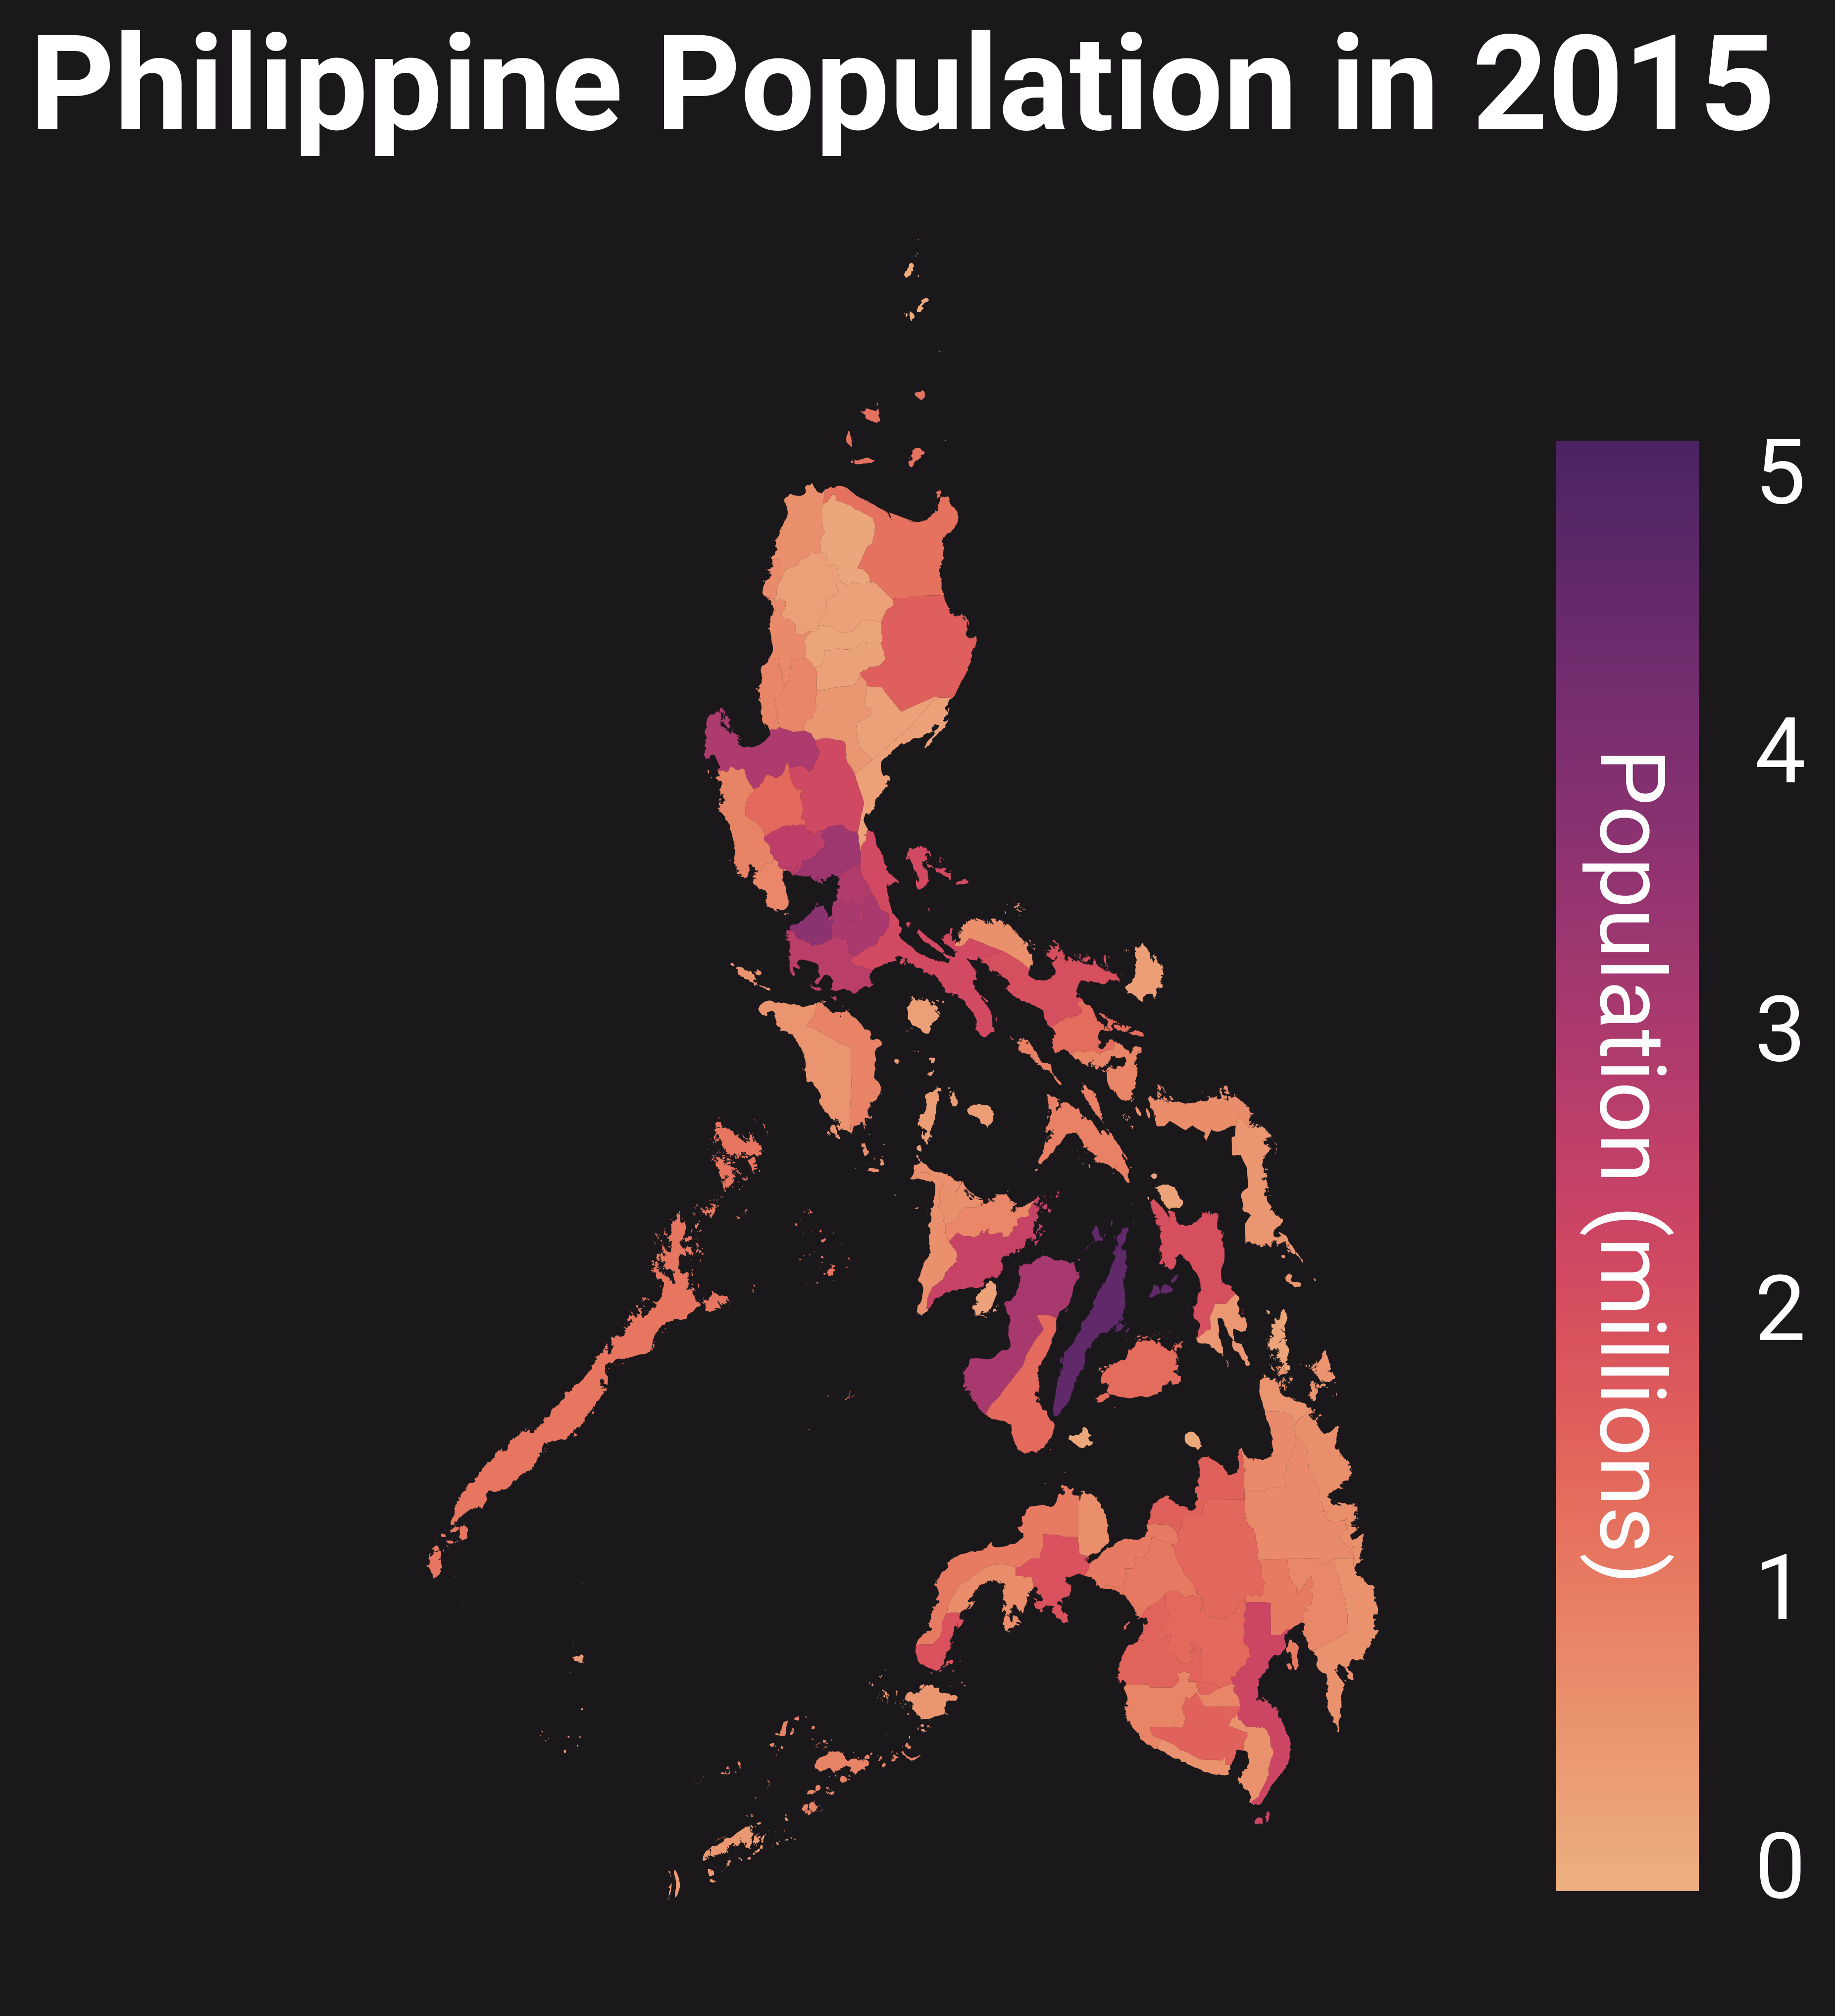

In [ ]:
# @title Displaying geospatial data

# Load PH map
gdf_ph = gpd.read_file("https://github.com/godalida/geopandas-philippines/raw/master/data/CashaCart.shp")
gdf_ph.rename(columns={"Province": "province"}, inplace=True)

# Load population data
df_pop = pd.read_csv('https://raw.githubusercontent.com/ndejong/philippines-data/master/data/2015%20Population%20Density_web_clean-columns.csv')
df_popreg = df_pop.groupby(by=['province']).sum()
df_popreg = df_popreg.reset_index()

# Plot the map
# fig, ax = plt.subplots(1, 1, figsize=(16, 8))

# gdf_ph.plot(ax=ax, aspect='equal', color=colors[4])
# ax.spines['top'].set_visible(False);ax.spines['bottom'].set_visible(False);ax.spines['left'].set_visible(False);ax.spines['right'].set_visible(False)
# ax.tick_params(axis='y',which='both',left='off',right='off',color='none',labelcolor='none')
# ax.tick_params(axis='x',which='both',top='off',bottom='off',color='none',labelcolor='none')

# Merge dataframes
gdf = pd.merge(gdf_ph, df_popreg, on=['province'])
gdf['population_2015m'] = gdf['population_2015']/1.e6 # convert to million unit

fig, ax = plt.subplots(figsize=(16, 8))

# Plot choropleth map
vmin, vmax = -0.1, 5.1
g = gdf.plot(column='population_2015m', cmap='flare', vmin=vmin, vmax=vmax, ax=ax)

# Clean up
g.set_axis_off()
g.spines[['left', 'bottom', 'right', 'top', ]].set_visible(False)

# Add colorbar
# https://stackoverflow.com/a/36080553
cax = fig.add_axes([0.65, 0.15, 0.03, 0.61])
sm = plt.cm.ScalarMappable(cmap='flare', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# sm._A = [] # what for?
cbar = f.colorbar(sm, cax=cax)
cbar.set_label('Population (millions)', labelpad=-32, rotation=270)
cbar.outline.set_visible(False)

# Add titles, labels, and legends
g.set_title('Philippine Population in 2015', pad=-30)

plt.show()

# Baesian Plots


In [ ]:
# @title Displaying trends
date_map = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06',
            'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}

df = df_flights.copy()
df['month'] = df['month'].map(date_map)
df['date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))

f, ax = plt.subplots(figsize=(16, 8))

# sns.lineplot(data=df, x='date', y='passengers', ax=ax, color=colors[0]) # monotone plot

# Plot monthly data per year
for c, y in zip(range(df['year'].nunique()), df['year'].unique()):
  idx = df.index[df['year'] == y].tolist()
  if min(idx)-1 > 0: idx.insert(0, min(idx)-1)
  df_y = df.iloc[idx]
  sns.lineplot(data=df_y, x='date', y='passengers',
               ax=ax, color=colors_grad[c], legend=False)

# Plot peaks per year
msk = df.groupby(['year'])['passengers'].transform('max') == df['passengers']
peak_dates = df.loc[msk, ['passengers', 'month', 'date']]
for index, row in peak_dates.iterrows():
  height = ax.get_ylim()[1]-ax.get_ylim()[0]
  m, x, y = row['month'], row['date'], (row['passengers']-ax.get_ylim()[0])/height-0.005

  if m == '07':
    ax.axvline(x=x, ymax=y, color=color_text, linestyle=':', alpha=0.5, label='Jul')
  elif m == '08':
    ax.axvline(x=x, ymax=y, color=color_text, linestyle='dashed', dashes=(5, 5), alpha=0.5, label='Aug')

# Plot regression line
df['date_reg'] = mpl.dates.date2num(df['date']) # regplot does not work with timestamps
sns.regplot(data=df, x='date_reg', y='passengers', order=2,
            ax=ax, scatter=False, color=colors[0])


# Add titles, labels, and legends
ax.set(xlabel=None, ylabel='Passengers (thousands)')
ax.set_title('Estimated US Airline Passengers')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='lower right',
           facecolor=color_bg, framealpha=1, frameon=True, handletextpad=0.5, title='Peaks')

plt.show()

NameError: name 'df_flights' is not defined

# Scratch